In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

In [3]:
df = pd.read_table('data.tsv')

In [4]:
df = df.drop(['Search Parameters', 'Death Description', 'Missing Description', 'Injuries Description', 'Damage Description', 'Houses Destroyed Description', 'Houses Damaged Description', 'Total Death Description', 'Total Missing Description', 'Total Injuries Description', 'Total Damage Description', 'Total Houses Destroyed Description', 'Total Houses Damaged Description'], axis=1)
df = df.drop(index=0, axis=0)

In [5]:
df.head(8)

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged,Total Deaths,Total Missing,Total Injuries,Total Damage ($Mil),Total Houses Destroyed,Total Houses Damaged
1,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"JORDAN: BAB-A-DARAA,AL-KARAK",31.100,35.5,NaN,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA: UGARIT,35.683,35.8,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,38.000,58.2,18.0,7.1,10.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE: THERA ISLAND (SANTORINI),36.400,25.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-1566.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,ISRAEL: ARIHA (JERICHO),31.500,35.3,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-1450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ITALY: LACUS CIMINI,35.500,25.5,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-1365.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,SYRIAN COASTS,35.683,35.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-1250.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,ISRAEL: ARIHA (JERICHO),32.000,35.5,NaN,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(6351, 26)

In [7]:
nan_counts = df.isna().mean()*100

print(nan_counts)

Year                       0.000000
Mo                         6.439931
Dy                         8.911982
Hr                        32.278381
Mn                        35.490474
Sec                       31.522595
Tsu                       69.122973
Vol                       98.787593
Location Name              0.015746
Latitude                   0.818769
Longitude                  0.818769
Focal Depth (km)          46.717052
Mag                       27.964100
MMI Int                   51.739883
Deaths                    66.430483
Missing                   99.606361
Injuries                  78.712014
Damage ($Mil)             91.339946
Houses Destroyed          86.458825
Houses Damaged            91.434420
Total Deaths              69.422138
Total Missing             99.559125
Total Injuries            78.381357
Total Damage ($Mil)       91.733585
Total Houses Destroyed    85.954968
Total Houses Damaged      92.316171
dtype: float64


In [19]:
# set the 'Total Deaths' column equal to the 'Deaths' column if the 'Total Deaths' column is 0 or NaN.
df.loc[df['Total Deaths'].isna() | (df['Total Deaths'] == 0), 'Total Deaths'] = df['Deaths']

In [20]:
df_after_1963 = df[df['Year'] > 1963]
print(df_after_1963.shape)

(2415, 26)


In [28]:
print(df.loc[df['Total Deaths'].isna() | (df['Total Deaths'] == 0), 'Total Deaths'])

1      NaN
2      NaN
4      NaN
5      NaN
6      NaN
        ..
6339   NaN
6341   NaN
6342   NaN
6344   NaN
6348   NaN
Name: Total Deaths, Length: 4098, dtype: float64


In [21]:
print(df_after_1963['Total Deaths'].value_counts(dropna=False))

NaN        1323
1.0         265
2.0         139
3.0          71
4.0          46
           ... 
738.0         1
25000.0       1
274.0         1
114.0         1
51003.0       1
Name: Total Deaths, Length: 223, dtype: int64


The first 89 installations for the WWSN (World-Wide Standardized Seismograph Network) were finished by the end of 1963.

The number of records after 1963 is **2415**.

The number of records after 1963 for which data on the total number of deaths is recored, is **1092**.

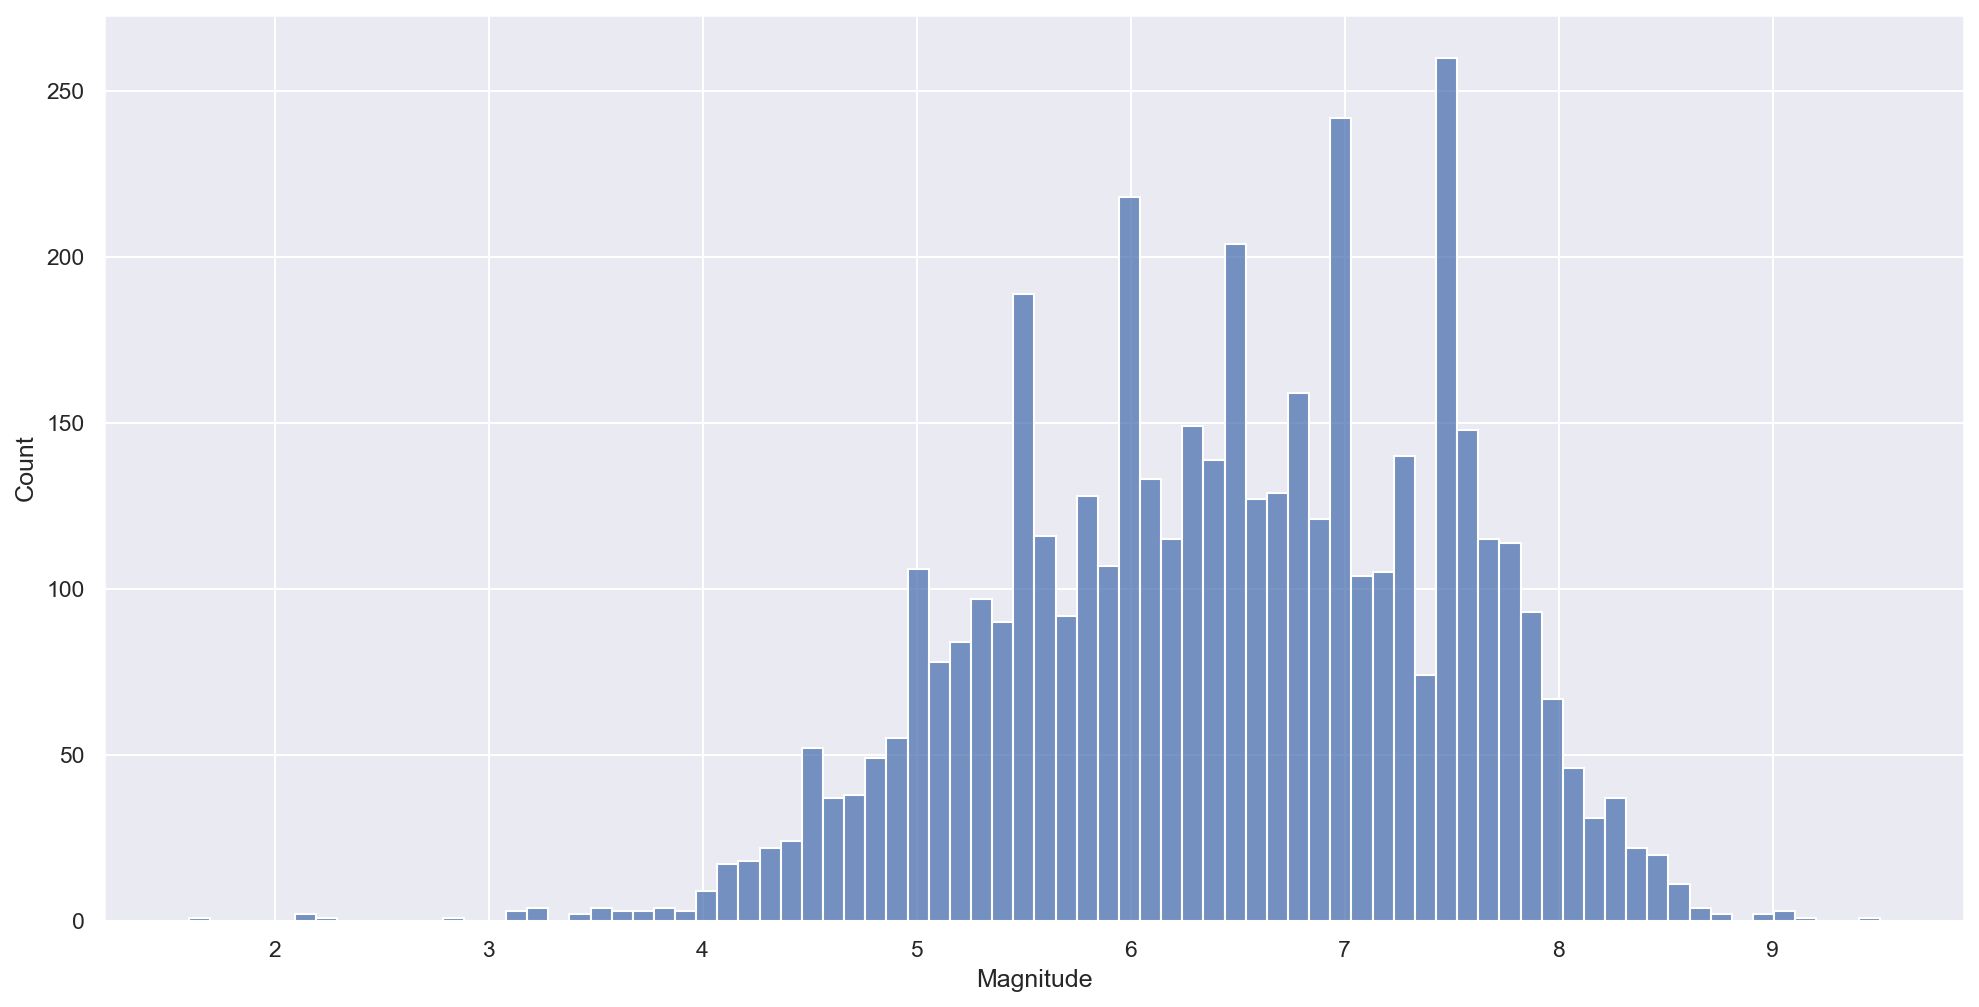

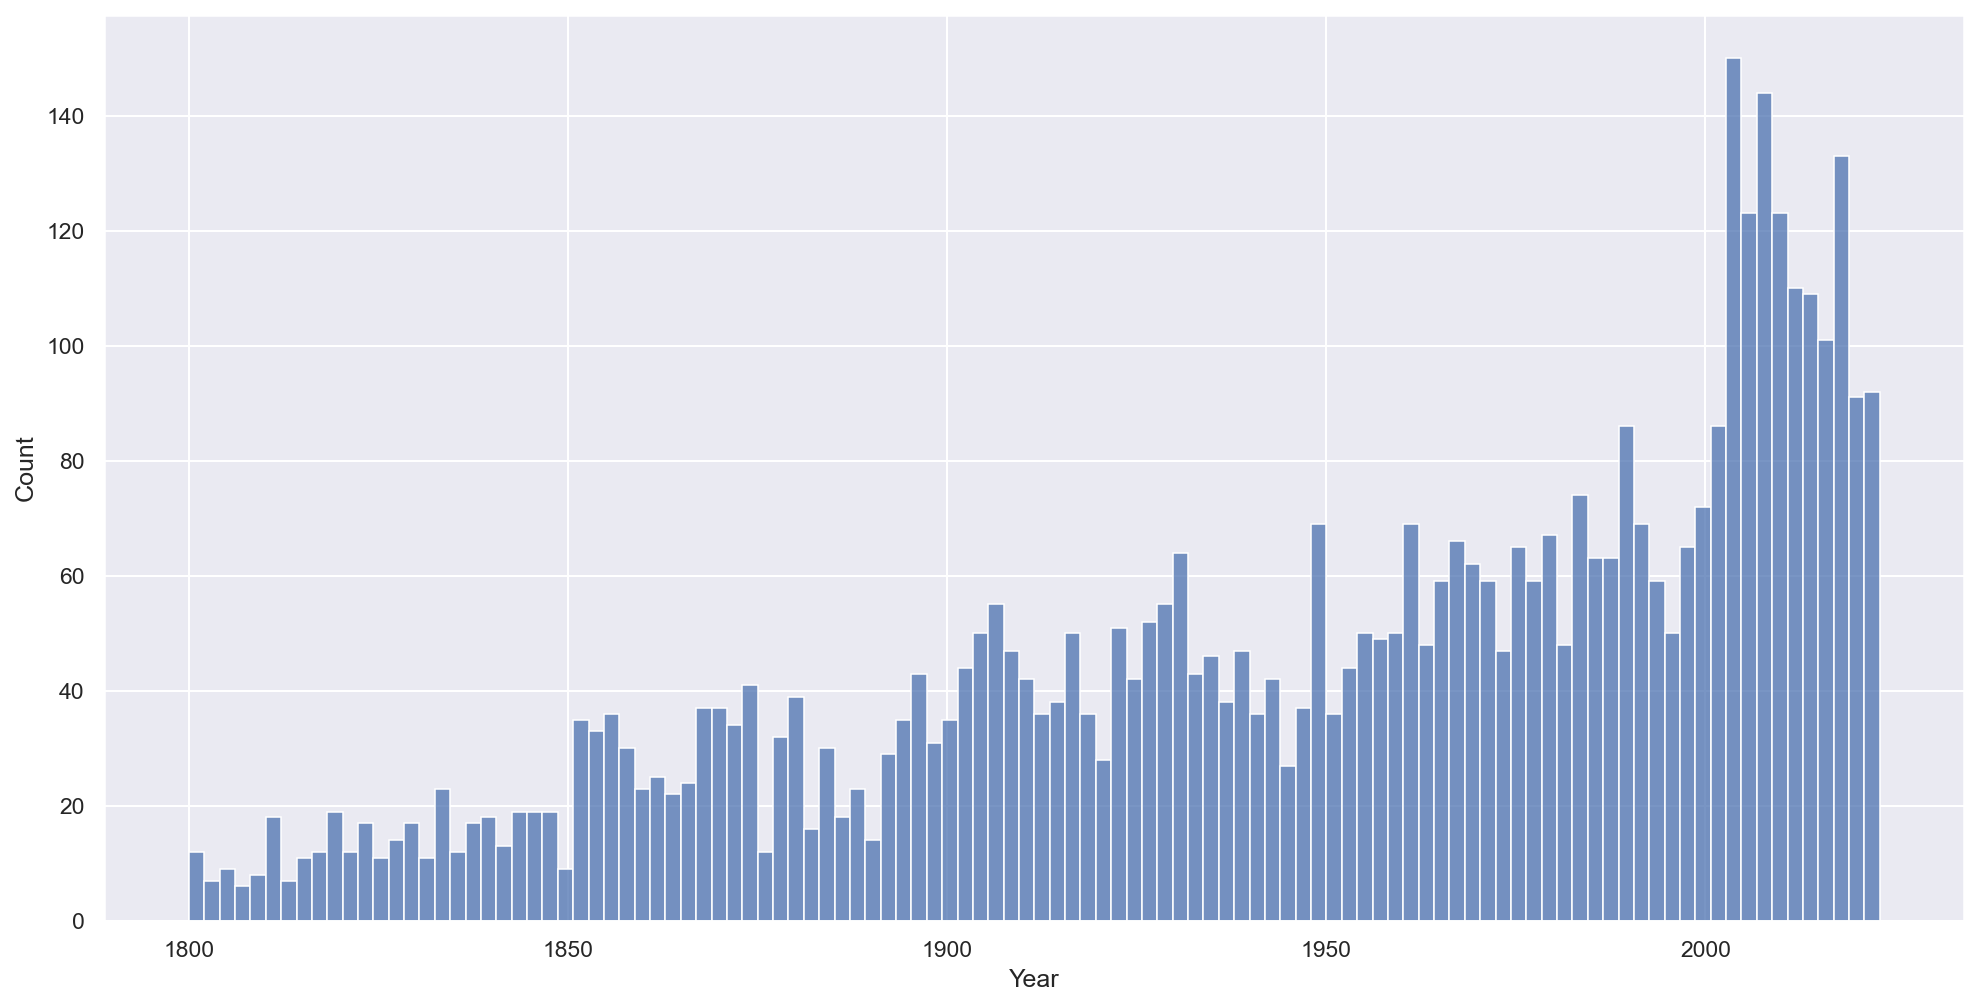

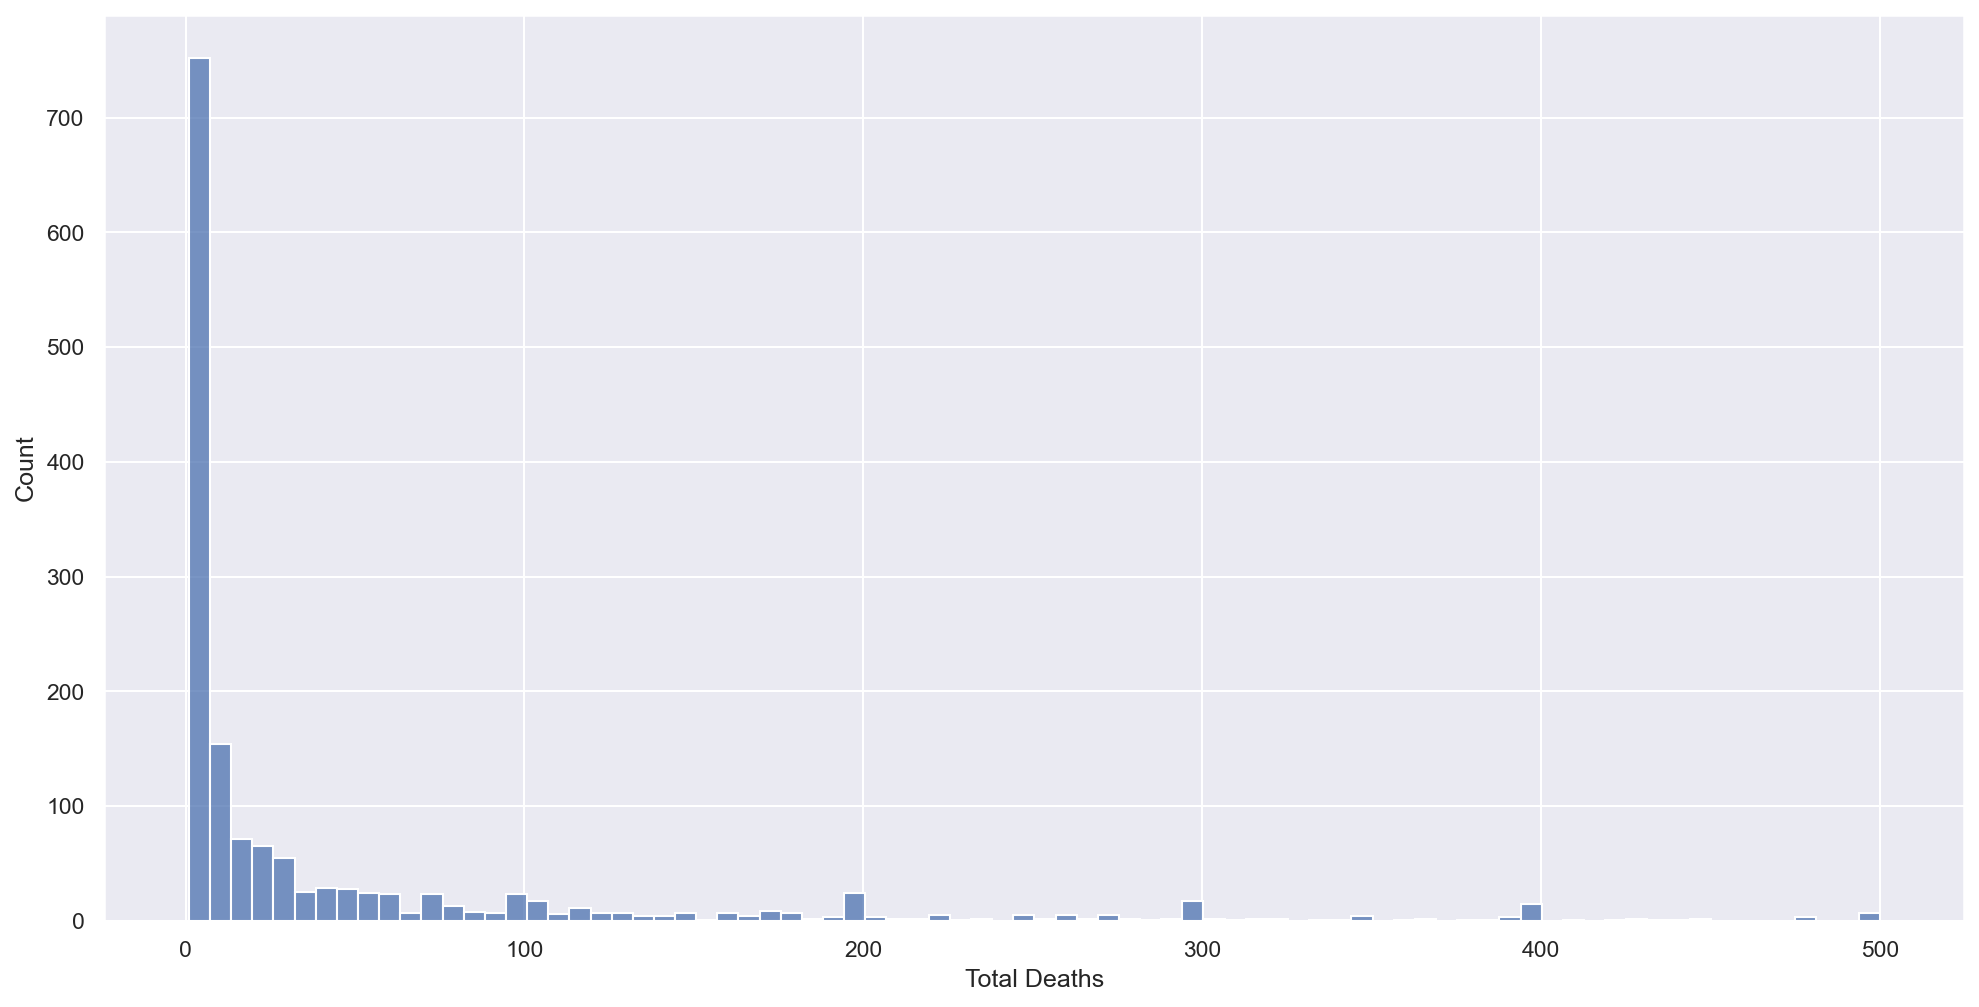

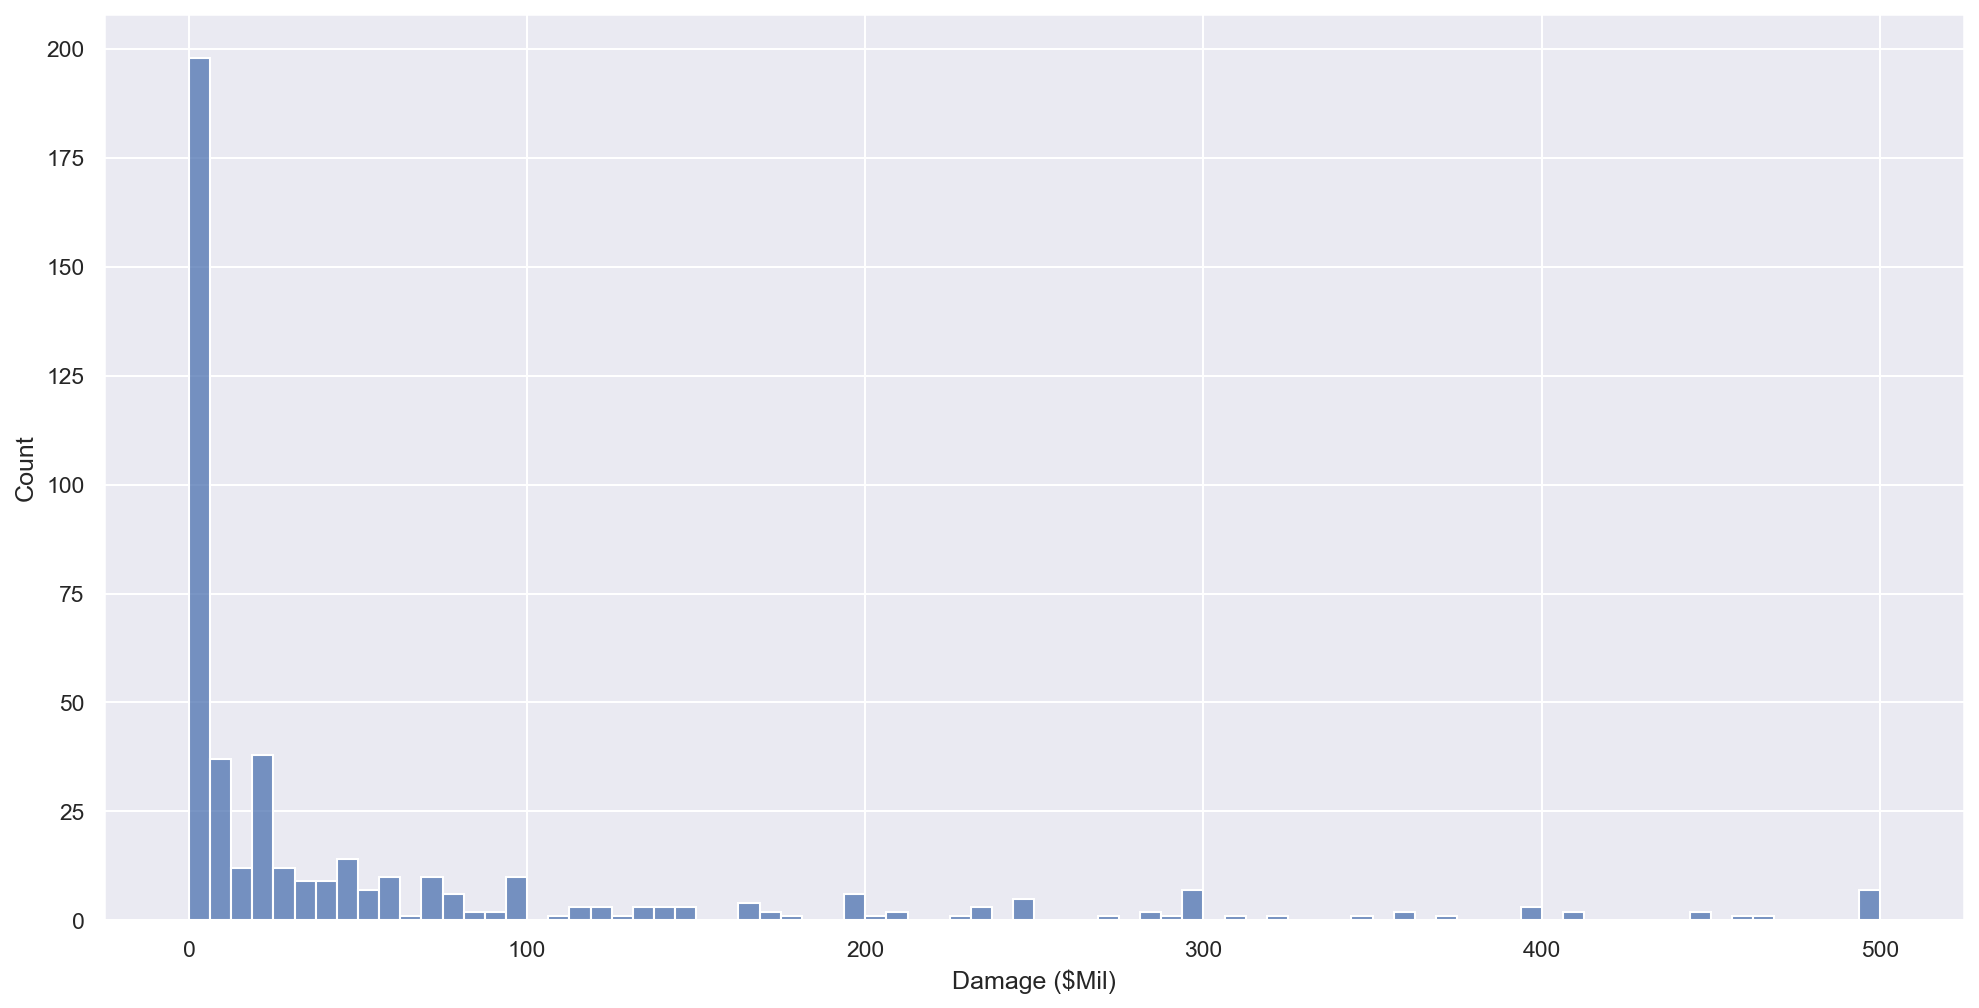

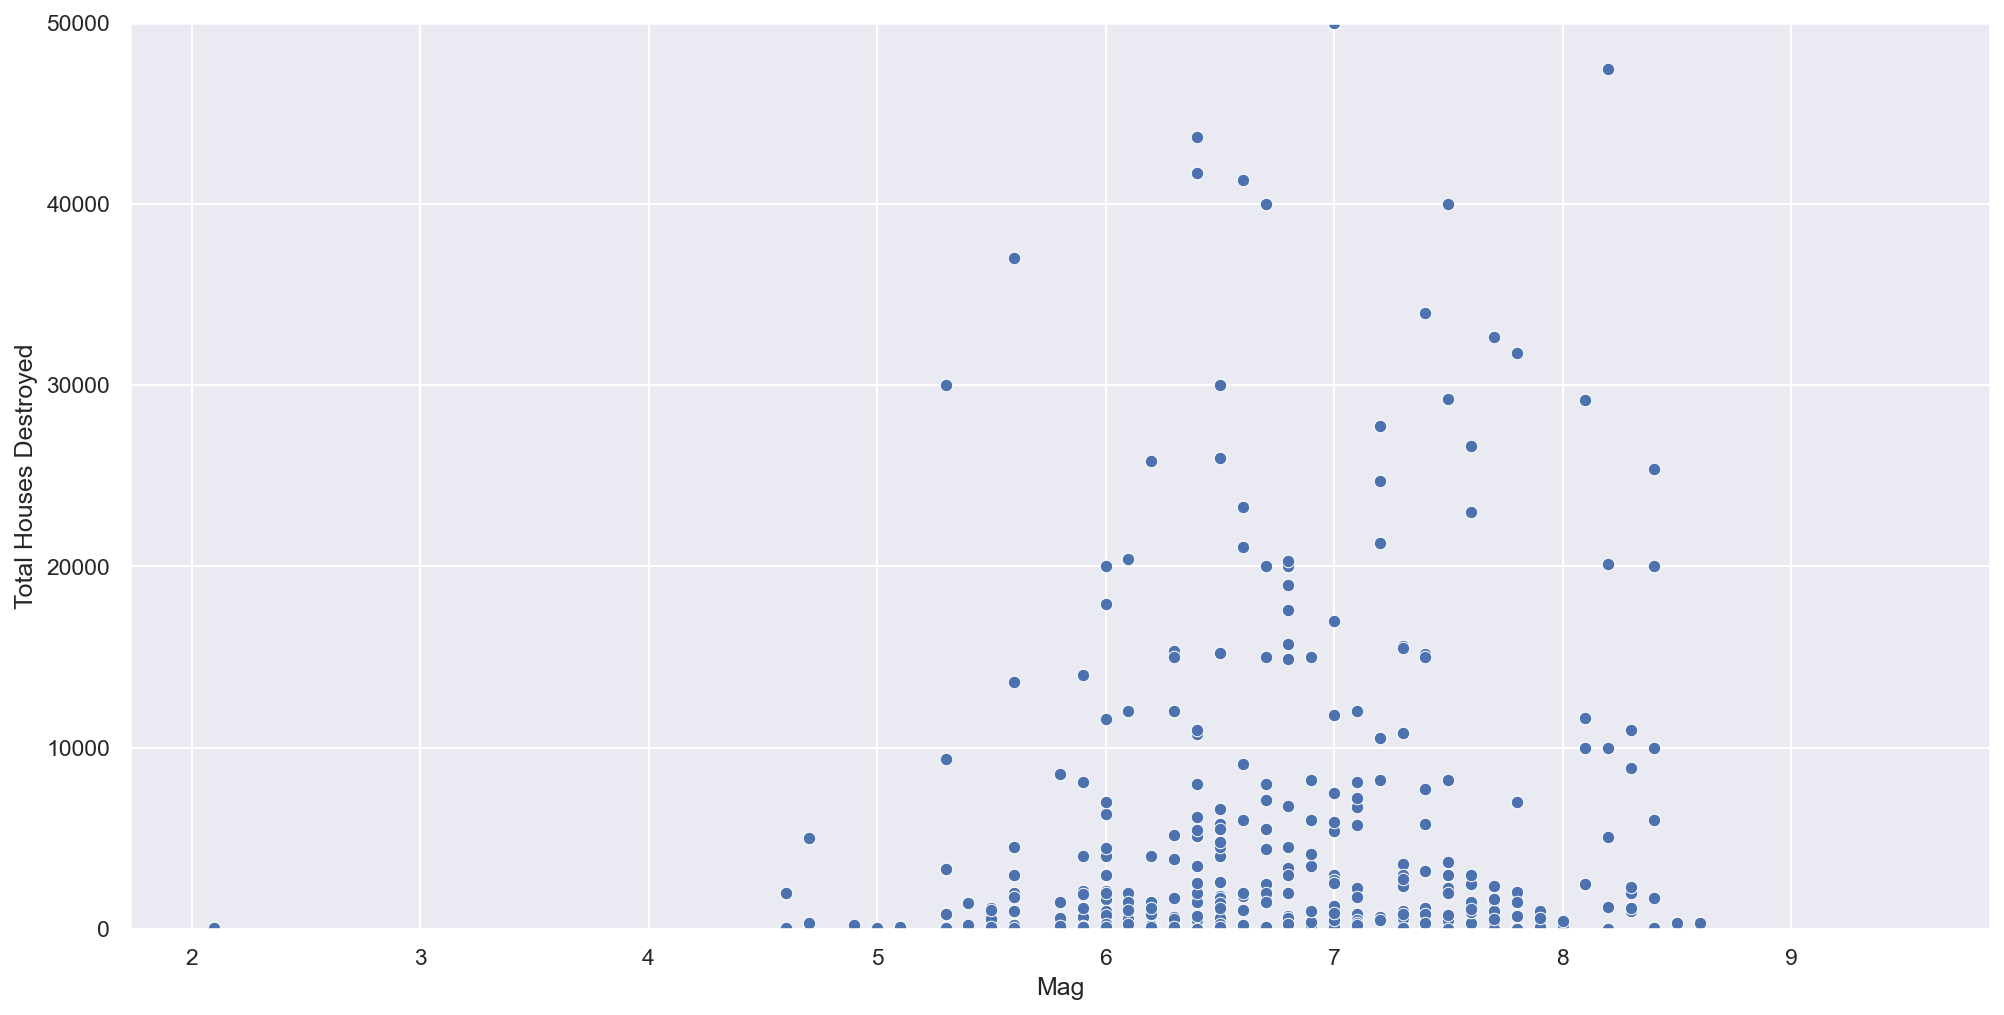

In [8]:
plt.figure()
sns.histplot(df['Mag'], bins=80)
plt.xlabel('Magnitude')
plt.show()

plt.figure()
sns.histplot(df.loc[df['Year'] >= 1800, 'Year'], bins=110)
plt.show()

plt.figure()
sns.histplot(df.loc[df['Total Deaths'] <= 500, 'Total Deaths'], bins=80)
plt.show()

plt.figure()
sns.histplot(df.loc[df['Damage ($Mil)'] <= 500, 'Damage ($Mil)'], bins=80)
plt.show()

df_only_deaths = df[df['Total Deaths'] >= 10]

plt.figure()
sns.scatterplot(data=df_only_deaths, x='Mag', y='Total Houses Destroyed')
plt.ylim(0, 50000)
plt.show()